In [1]:
!wget https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AAC4IW1ZnCjTjgcNQCt6Cj9Oa/train/images.csv https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AACFwWqQVAHzMACFr1SAlIDsa/train/labels.csv https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AADE7RT0aVFEWArFyEM6Qmt7a/valid/images%20%281%29.csv https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AAD8wL5muOjD0t-FZMSY5cz-a/valid/labels%20%281%29.csv

--2023-01-16 13:52:13--  https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AAC4IW1ZnCjTjgcNQCt6Cj9Oa/train/images.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/pwbc7gvqqmn9fzk/AAC4IW1ZnCjTjgcNQCt6Cj9Oa/train/images.csv [following]
--2023-01-16 13:52:13--  https://www.dropbox.com/sh/raw/pwbc7gvqqmn9fzk/AAC4IW1ZnCjTjgcNQCt6Cj9Oa/train/images.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb94cf38d3350600f479842f4bf.dl.dropboxusercontent.com/cd/0/inline/B0qKLcMJ2DmABuPaePf2onhgsTRNJQJ0HUXx2TdV9EyN7FO9p2wTdkTJLsSn2nMD8PEVIilaPkP07f9lYlI-G9bBNEmCD53418AGu1lEWSYtwR8f_Ulcelcj-cWuWqJuCWSGixK94ObiwaF8pMikFOQt4mYTzbzZme9QlSOrjD5PEw/file# [following]
--2023-01-16 13:52:14--  https://ucb94cf38d3350600f479842f4bf.dl.dropboxusercontent.

### Import Required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly.express as px
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation,BatchNormalization,MaxPool2D
from keras import regularizers
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

### Load and Preprocess the data


In [3]:
train_images=pd.read_csv("images.csv",header=None)
test_images=pd.read_csv("images (1).csv",header=None)
train_labels=pd.read_csv("labels.csv",header=None,names=['Squiggle', 'Narrowband', 'Narrowbanddrd', 'Noise'])
test_labels=pd.read_csv("labels (1).csv",header=None,names=['Squiggle', 'Narrowband', 'Narrowbanddrd', 'Noise'])

In [4]:
train_images

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,...,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,...,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0.631373,0.666667,0.627451,0.607843,0.639216,0.615686,0.623529,0.588235,0.611765,0.635294,...,0.592157,0.611765,0.596078,0.607843,0.639216,0.658824,0.643137,0.627451,0.607843,0.647059
3196,0.662745,0.627451,0.686275,0.615686,0.639216,0.717647,0.674510,0.643137,0.729412,0.701961,...,0.603922,0.627451,0.662745,0.654902,0.701961,0.701961,0.647059,0.615686,0.635294,0.623529
3197,0.647059,0.650980,0.643137,0.596078,0.529412,0.568627,0.607843,0.631373,0.635294,0.658824,...,0.631373,0.658824,0.639216,0.647059,0.619608,0.603922,0.603922,0.643137,0.619608,0.564706
3198,0.694118,0.709804,0.580392,0.650980,0.631373,0.686275,0.623529,0.650980,0.678431,0.666667,...,0.658824,0.674510,0.615686,0.686275,0.670588,0.619608,0.678431,0.682353,0.623529,0.647059


In [5]:
test_images

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.686275,0.725490,0.737255,0.694118,0.658824,0.674510,0.643137,0.752941,0.678431,0.654902,...,0.674510,0.709804,0.643137,0.674510,0.682353,0.658824,0.741176,0.658824,0.705882,0.701961
1,0.615686,0.631373,0.705882,0.678431,0.698039,0.639216,0.619608,0.654902,0.678431,0.682353,...,0.662745,0.674510,0.674510,0.721569,0.709804,0.666667,0.619608,0.709804,0.705882,0.682353
2,0.670588,0.690196,0.698039,0.647059,0.650980,0.670588,0.721569,0.701961,0.647059,0.678431,...,0.666667,0.670588,0.682353,0.698039,0.662745,0.619608,0.650980,0.662745,0.717647,0.650980
3,0.682353,0.650980,0.682353,0.670588,0.690196,0.701961,0.721569,0.709804,0.690196,0.650980,...,0.694118,0.737255,0.733333,0.717647,0.674510,0.678431,0.745098,0.705882,0.709804,0.717647
4,0.647059,0.690196,0.717647,0.666667,0.654902,0.639216,0.654902,0.674510,0.682353,0.674510,...,0.662745,0.682353,0.698039,0.705882,0.662745,0.678431,0.682353,0.725490,0.670588,0.658824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.603922,0.662745,0.658824,0.678431,0.647059,0.654902,0.639216,0.631373,0.709804,0.674510,...,0.729412,0.686275,0.635294,0.690196,0.580392,0.592157,0.639216,0.650980,0.682353,0.654902
796,0.549020,0.678431,0.615686,0.549020,0.635294,0.580392,0.674510,0.556863,0.623529,0.650980,...,0.647059,0.650980,0.596078,0.596078,0.654902,0.635294,0.647059,0.549020,0.623529,0.631373
797,0.705882,0.686275,0.588235,0.670588,0.717647,0.654902,0.662745,0.662745,0.662745,0.647059,...,0.678431,0.717647,0.717647,0.666667,0.682353,0.666667,0.690196,0.658824,0.650980,0.662745
798,0.643137,0.654902,0.650980,0.674510,0.631373,0.615686,0.639216,0.615686,0.670588,0.647059,...,0.603922,0.619608,0.623529,0.552941,0.596078,0.611765,0.643137,0.588235,0.611765,0.666667


In [6]:
train_labels

,Squiggle,Narrowband,Narrowbanddrd,Noise
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
3195,0.0,1.0,0.0,0.0
3196,0.0,1.0,0.0,0.0
3197,0.0,1.0,0.0,0.0
3198,0.0,1.0,0.0,0.0


In [7]:
test_labels

,Squiggle,Narrowband,Narrowbanddrd,Noise
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
795,0.0,1.0,0.0,0.0
796,0.0,1.0,0.0,0.0
797,0.0,1.0,0.0,0.0
798,0.0,1.0,0.0,0.0


### Check the shape of training and testing dataset

In [8]:
print(train_images.shape,test_images.shape,train_labels.shape,test_labels.shape)

(3200, 8192) (800, 8192) (3200, 4) (800, 4)


### Data Distribution

In [9]:
y = [len(train_labels[train_labels[column]==1]) for column in list(train_labels.columns)] 
y

[800, 800, 800, 800]

In [10]:
CLASS_LABELS  = ['Squiggle', 'Narrowband', 'Narrowbanddrd', 'Noise']
fig = px.bar(x = CLASS_LABELS,
             y = [len(train_labels[train_labels[column]==1]) for column in list(train_labels.columns)]  ,
             color_continuous_scale="Emrld") 
fig.update_xaxes(title="RadioSignals")
fig.update_yaxes(title = "Number of Signals")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Train Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

### Reshape training and validation images
* Convert into Numpy array and reshape 


In [11]:
train_images=np.asarray(train_images)
test_images=np.asarray(test_images)
train_labels=np.asarray(train_labels)
test_labels=np.asarray(test_labels)

train_images=train_images.reshape(3200,64,128)
test_images=test_images.reshape(800,64,128)


### Visulaize the dataset

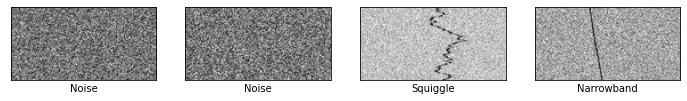

In [12]:
plt.figure(0,figsize=(12,12))
index = np.random.randint(0,train_images.shape[0],4)
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.xticks([])
  plt.yticks([])
  img=np.squeeze(train_images[index[i]])
  plt.imshow(img,cmap='gray')
  plt.xlabel(CLASS_LABELS[np.argmax(train_labels[index[i]])])

### Create training and validation data generators using keras Imagedatagenerator

In [13]:
train_images_fit=train_images.reshape(3200,64,128,1)
test_images_fit=test_images.reshape(800,64,128,1)

a=np.zeros((3200,64,128,3))
b=np.zeros((800,64,128,3))

for i in range(3200):
  for j in range(64):
    for k in range(128):
      a[i][j][k][0]=train_images_fit[i][j][k][0]
      a[i][j][k][1]=train_images_fit[i][j][k][0]
      a[i][j][k][2]=train_images_fit[i][j][k][0]
      
for i in range(800):
  for j in range(64):
    for k in range(128):
      b[i][j][k][0]=test_images_fit[i][j][k][0]
      b[i][j][k][1]=test_images_fit[i][j][k][0]
      b[i][j][k][2]=test_images_fit[i][j][k][0]

In [14]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               shear_range=0.2,
                               horizontal_flip = True,
                               vertical_flip=True,
                               zoom_range = 0.2)
test_datagen = ImageDataGenerator() 

train_generator = train_datagen.flow(a, train_labels, batch_size=32)
val_generator = test_datagen.flow(b, test_labels, batch_size=32)

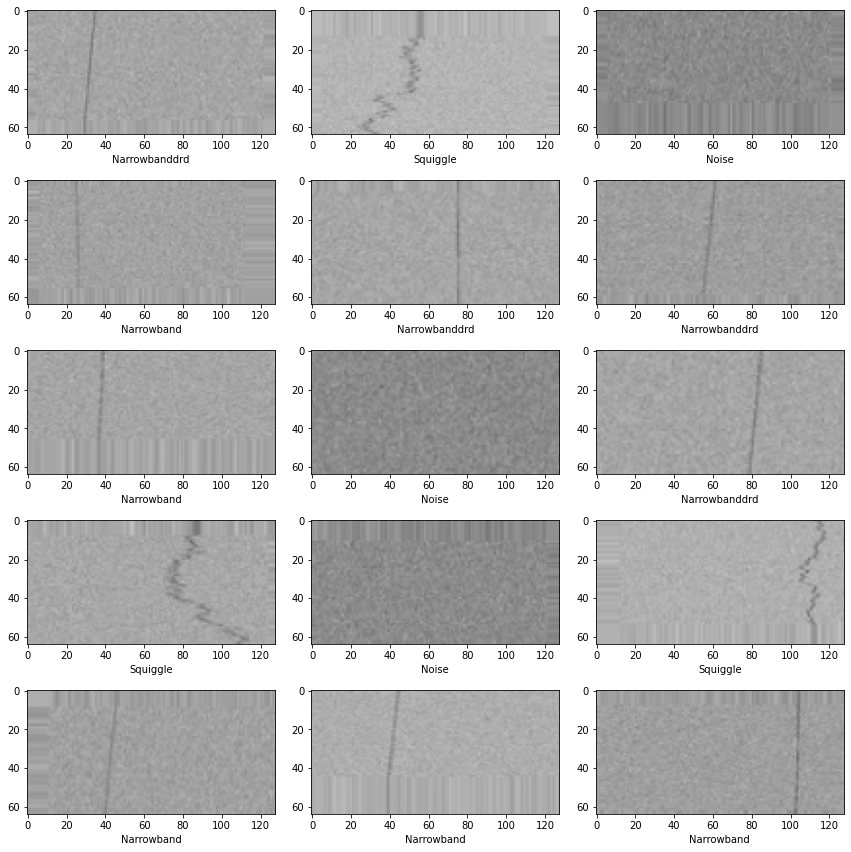

In [15]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        plt.xlabel(CLASS_LABELS[np.argmax(Y_batch[0])])
        break
plt.tight_layout()
plt.show()

## Design a CNN Model

In [16]:
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.callbacks import EarlyStopping,ModelCheckpoint

input_shape = (64, 128, 3)
epochs = 12
batch_size = 32
pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(4, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

### Compile the Model using Adam optimizer, categorical_crossentropy loss function, and accuracy metric

* Print Model summary

In [17]:
model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 128, 3)]      0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 128, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 128, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 32, 128)       0     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



## Train model

In [18]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, 
                              restore_best_weights=True,mode="max",patience = 5),
                ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                                save_best_only=True,mode="max")]

In [19]:
training = model.fit_generator(train_generator,
                   epochs=12,
                   validation_data=val_generator,
                   callbacks=[checkpointer])

<ipython-input-19-184622ea956e>:1: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/12
100/100 [==============================] - ETA: 0s - loss: 0.5649 - accuracy: 0.6925
Epoch 1: val_accuracy improved from -inf to 0.74875, saving model to best_model.h5
100/100 [==============================] - 12s 82ms/step - loss: 0.5649 - accuracy: 0.6925 - val_loss: 0.3645 - val_accuracy: 0.7487
Epoch 2/12
100/100 [==============================] - ETA: 0s - loss: 0.3989 - accuracy: 0.7509
Epoch 2: val_accuracy did not improve from 0.74875
100/100 [==============================] - 8s 77ms/step - loss: 0.3989 - accuracy: 0.7509 - val_loss: 0.3620 - val_accuracy: 0.7462
Epoch 3/12
100/100 [==============================] - ETA: 0s - loss: 0.3844 - accuracy: 0.7541
Epoch 3: val_accuracy improved from 0.74875 to 0.75750, saving model to best_model.h5
100/100 [==============================] - 8s 81ms/step - loss: 0.3844 - accuracy: 0.7541 - val_loss: 0.3504 - val_accuracy: 0.7575
Epoch 4/12
100/100 [==============================] - ETA: 0s - loss: 0.3806 - accuracy: 0.7506

## Evaluate the model

In [20]:
score1=model.evaluate(b,test_labels)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

25/25 [==============================] - 1s 30ms/step - loss: 0.3477 - accuracy: 0.7675
Test loss: 0.34772372245788574
Test accuracy: 0.7674999833106995


In [21]:
score2=model.evaluate(val_generator)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

25/25 [==============================] - 1s 31ms/step - loss: 0.3477 - accuracy: 0.7675
Test loss: 0.34772372245788574
Test accuracy: 0.7674999833106995


In [22]:
score = model.evaluate(train_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

100/100 [==============================] - 7s 69ms/step - loss: 0.3585 - accuracy: 0.7475
Test loss: 0.3585038483142853
Test accuracy: 0.7475000023841858


In [23]:
predict = model.predict(val_generator)
# predict the class label
predict

25/25 [==============================] - 1s 27ms/step


array([[1.0000000e+00, 1.5590886e-07, 3.2492317e-06, 2.5310406e-08],
       [1.0000000e+00, 6.2803842e-06, 7.9957055e-05, 5.8649894e-06],
       [4.7067076e-02, 9.5899642e-01, 9.6062535e-01, 3.6464702e-02],
       ...,
       [8.6408041e-02, 2.3206148e-02, 2.2972796e-02, 9.9952507e-01],
       [1.0000000e+00, 1.6266269e-07, 6.0203733e-06, 5.2154057e-08],
       [1.0000000e+00, 6.8085882e-07, 1.0465831e-05, 2.8318405e-07]],
      dtype=float32)

In [24]:
y_classes = predict.argmax(axis=-1)
y_classes


array([0, 0, 2, 3, 0, 0, 3, 2, 2, 3, 1, 0, 1, 3, 3, 3, 3, 3, 2, 1, 1, 0,
       2, 2, 2, 2, 2, 3, 3, 1, 2, 0, 3, 2, 1, 0, 2, 3, 1, 3, 2, 0, 1, 2,
       2, 1, 0, 0, 0, 3, 2, 1, 2, 2, 2, 0, 3, 3, 0, 2, 2, 2, 2, 3, 2, 0,
       2, 2, 3, 3, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 3, 2, 3, 2, 1, 2, 0,
       0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 3, 2, 3, 3, 2, 2, 2, 0,
       2, 2, 2, 0, 1, 2, 2, 0, 0, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 1,
       0, 0, 0, 1, 3, 0, 2, 1, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 0, 3, 3,
       2, 0, 0, 0, 3, 2, 2, 0, 2, 0, 1, 3, 2, 0, 0, 3, 3, 1, 0, 1, 3, 3,
       2, 2, 2, 3, 2, 3, 3, 0, 2, 2, 1, 2, 3, 3, 2, 0, 1, 3, 1, 2, 1, 2,
       2, 2, 3, 0, 0, 2, 0, 2, 3, 0, 0, 3, 2, 2, 2, 0, 3, 2, 2, 3, 0, 0,
       1, 3, 3, 3, 1, 2, 0, 3, 3, 2, 1, 0, 1, 1, 3, 3, 2, 0, 3, 0, 2, 2,
       1, 2, 0, 0, 2, 0, 3, 2, 3, 0, 1, 3, 3, 1, 3, 2, 2, 2, 2, 2, 3, 0,
       2, 1, 1, 3, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 3, 1, 3, 0, 0, 2, 0, 0,
       3, 2, 2, 3, 3, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0,

## Confusion Matrix

25/25 [==============================] - 1s 27ms/step


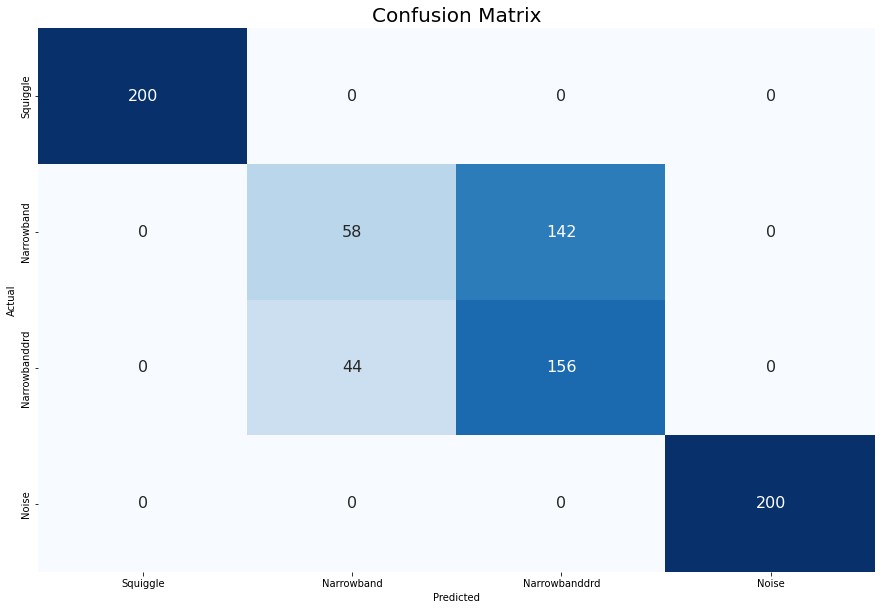

In [28]:

CLASS_LABELS  = ['Squiggle', 'Narrowband', 'Narrowbanddrd', 'Noise']

cm_data = confusion_matrix(np.argmax(test_labels, axis = 1 ), np.argmax(model.predict(b),axis=1))
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

## Classification Report

In [30]:
print(classification_report(np.argmax(test_labels, axis = 1 ), np.argmax(model.predict(b),axis=1)))

25/25 [==============================] - 1s 27ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       0.57      0.29      0.38       200
           2       0.52      0.78      0.63       200
           3       1.00      1.00      1.00       200

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.75       800
weighted avg       0.77      0.77      0.75       800

